In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Black Friday Sales Analysis**

**Load Dataset**

In [8]:
df = pd.read_csv('/train.csv')
print('Read The Data Successfully')

Read The Data Successfully


In [9]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
#Shape of dataset
df.shape

(550068, 12)

**Info function prints information about a DataFrame including the index dtype and columns, non-null values and memory usage**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [13]:
#change data type
columns = ['Gender', 'Age', 'City_Category']
for i in columns:
  df[i] = df[i].astype("category")

**If we would like to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method:**

**This method will provide various summary statistics, excluding NaN (Not a Number) value**

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**Isnull() function detects non-missing values in the dataframe. All of the non-missing values gets mapped to "False" and missing values get mapped to "True"**

In [15]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


**Check the NaN Values**

In [16]:
print("Check the NaN Values in Dataset")
print(df.isnull().sum())
print("_"*40)
print("Check the NaN Values in % in Dataset")
print(df.isnull().sum()/len(df) *100)

Check the NaN Values in Dataset
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
________________________________________
Check the NaN Values in % in Dataset
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.

In [17]:
# Drop Column 'Product_Category_3'
drop_column = ['Product_Category_3']
df.drop(drop_column, axis=1, inplace=True)

In [18]:
# Drop NaN Values in Producty_Category_2 Cloumn
df = df.dropna()

In [19]:
#Dropping the columns which have No significance
df.drop(['User_ID', 'Product_ID'], axis = 'columns', inplace=True)

In [20]:
df.head(3

)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
1,F,0-17,10,A,2,0,1,6.0,15200
3,F,0-17,10,A,2,0,12,14.0,1057
5,M,26-35,15,A,3,0,1,2.0,15227


# **Exploratory Data Analysis**

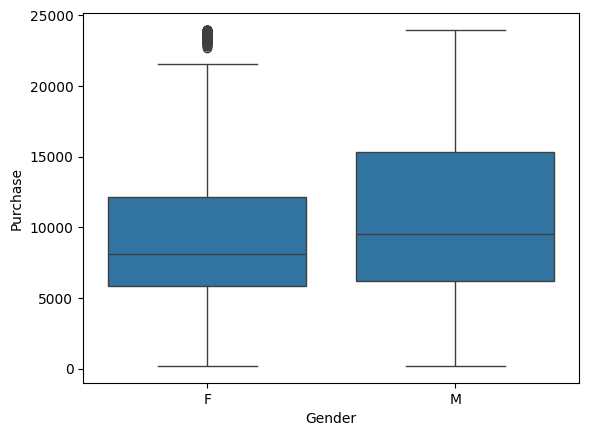

In [21]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)
plt.show()

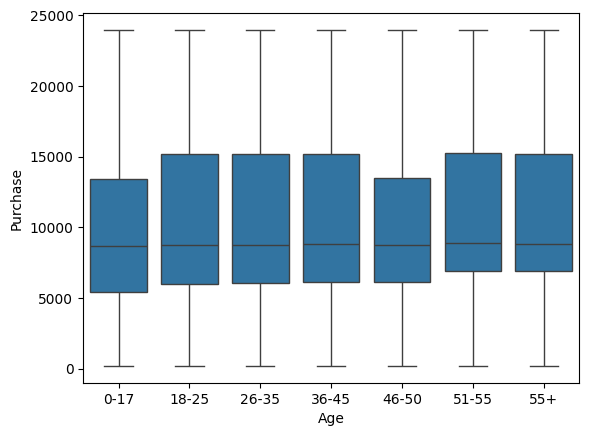

In [22]:
sns.boxplot(x = 'Age', y = 'Purchase', data = df)
plt.show()

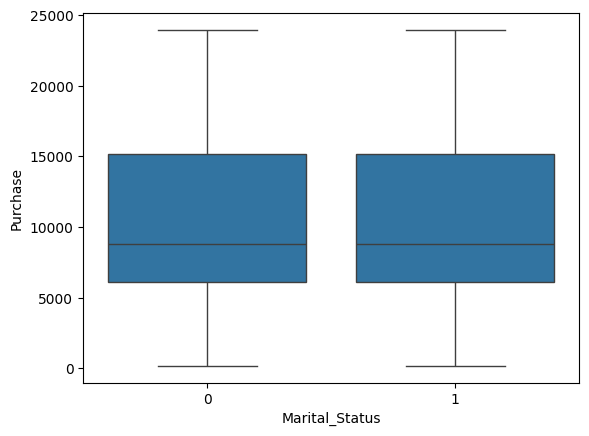

In [23]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df)
plt.show()

In [24]:
#Change Columns data types object to category
cat_cols = df.select_dtypes('category').columns.values
cat_cols

array(['Gender', 'Age', 'City_Category'], dtype=object)

In [25]:
def feature_categorical(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' Wise Sale',fontsize=15)
    sns.set(style= "darkgrid")
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()
    plt.savefig("Gender Wise Sale.jpg")

**Gender Wise Sale**

In [26]:
# df.Product_ID.value_counts()
df['Gender'].value_counts()

Gender
M    284900
F     91530
Name: count, dtype: int64

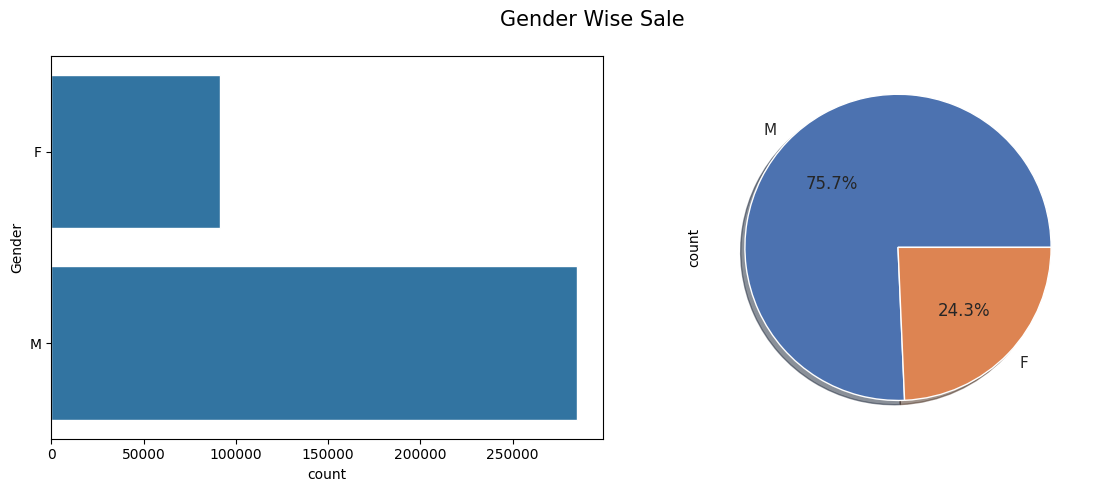

In [27]:
feature_categorical(df['Gender'])

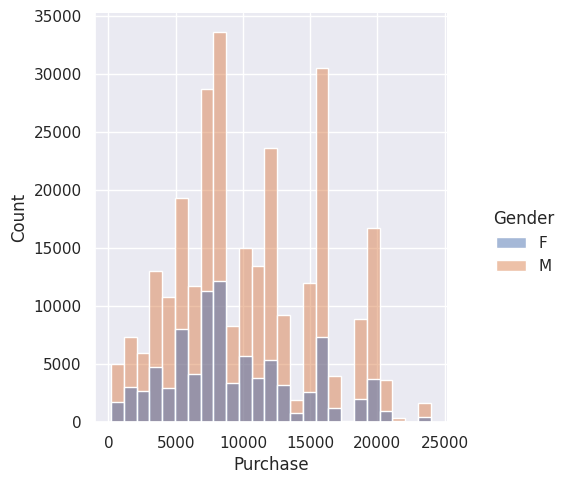

In [28]:
sns.displot(data = df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()


As we can se that there are nunmber of males purchasing than female.

**Age Wise Sale**

In [29]:
df['Age'].value_counts()

Age
26-35    150160
36-45     75350
18-25     69157
46-50     31010
51-55     26024
55+       14081
0-17      10648
Name: count, dtype: int64

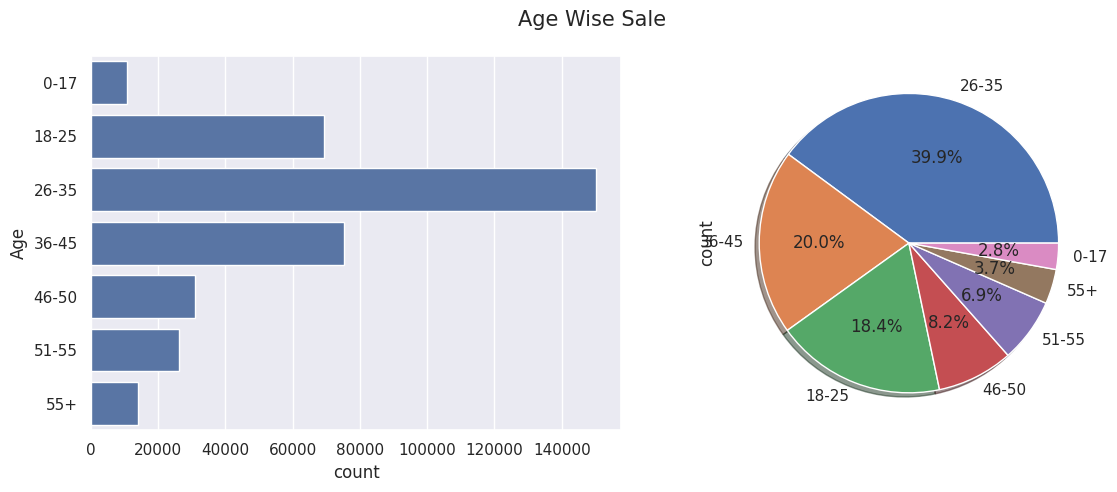

In [30]:
feature_categorical(df['Age'])


As we can see that the customers age group of 26-35 years are purchasing the most nearly 40% whereas the age range of 0-17 years least purchasing around 2.8%.

**City Category Wise Sale**

In [31]:
df['City_Category'].value_counts()

City_Category
B    157683
C    120386
A     98361
Name: count, dtype: int64

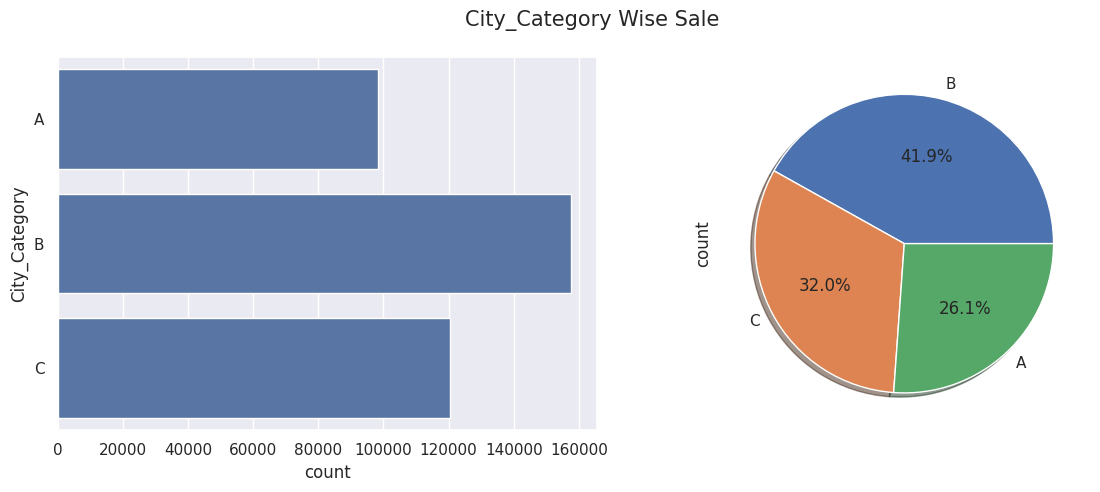

In [32]:
feature_categorical(df['City_Category'])

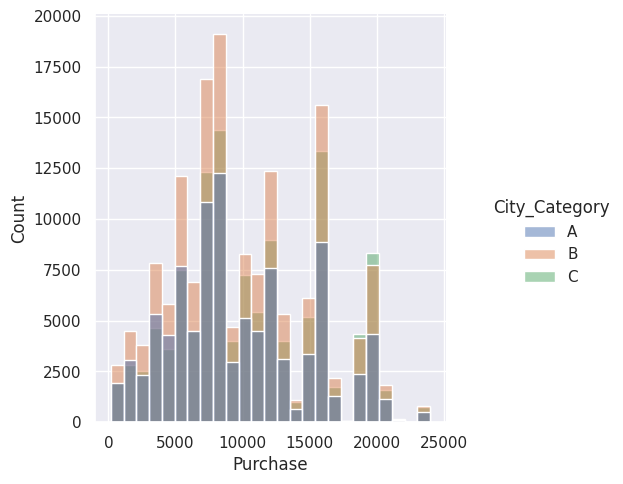

In [33]:
sns.displot(data = df, x = 'Purchase', hue = 'City_Category',bins = 25)
plt.show()

As we can see that the customers of City_Category 'B' are purchasing the most 41.9% whereas the City_Category 'A' are least purchasing.

**Marital Status Wise Sale**

In [34]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)

df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [35]:
df['Marital_Status'].value_counts()

Marital_Status
Unmarried    223483
Married      152947
Name: count, dtype: int64

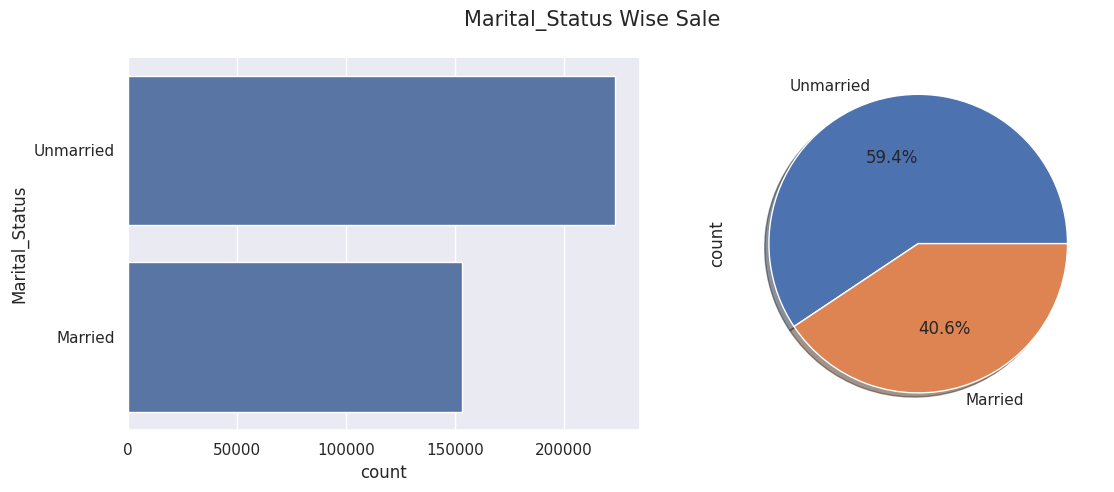

In [36]:
feature_categorical(df['Marital_Status'])

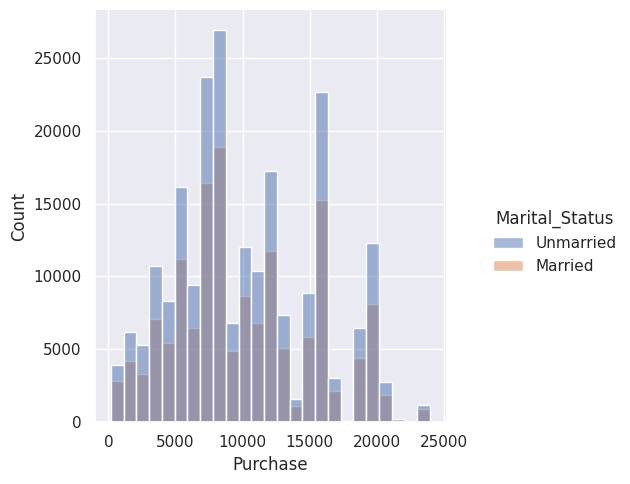

In [37]:
sns.displot(data = df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()


As we can see that the 'Unmarried' customers are purchasing the most 59.4% whereas the 'Married' are least purchasing around 40.6%.

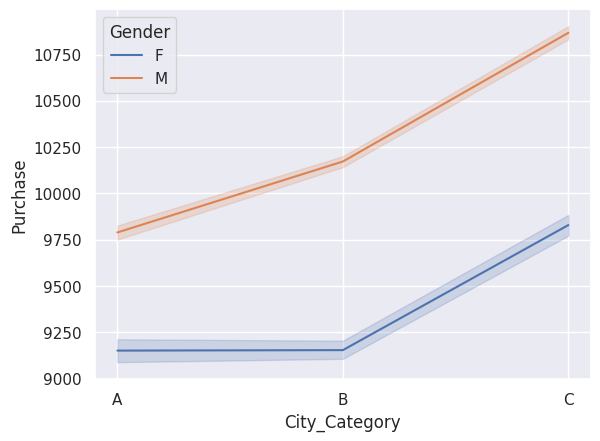

In [38]:
sns.lineplot(x='City_Category',y='Purchase',  data=df,  hue='Gender')
plt.show()

As we can see that the 'Male' and 'Female' customers are purchasing the most in City_Category 'C' whereas the Female are least interested in purchasing in City_Category 'B' and males from City_Category 'A' have shoen least interest.



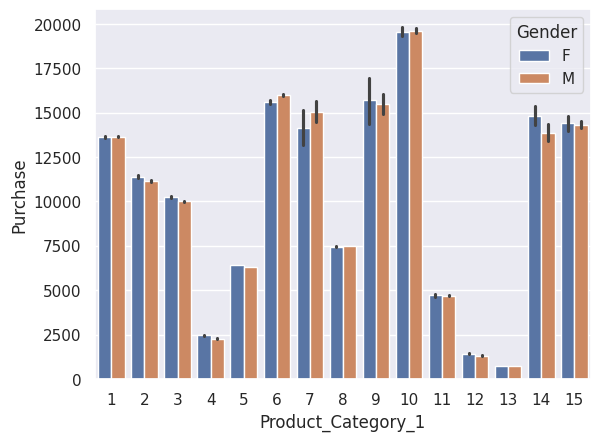

In [39]:
sns.barplot(x='Product_Category_1',y='Purchase',  data=df,  hue='Gender')
plt.show()

For Product_category_1 no. 1,6,7,9,10,14,15 customers are more interested in purchasing whereas 4,12 & 13, the customers seems to be least interested in purchasing

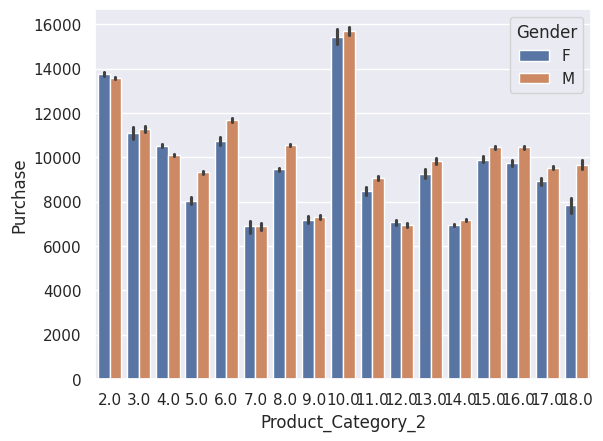

In [40]:
sns.barplot(x='Product_Category_2',y='Purchase',  data=df,  hue='Gender')
plt.show()

For Product_category_2 no. 2 & 10 customers are more interested in purchasing whereas 7,9,12 & 14, the customers seems to be least interested in purchasing.

In [41]:
#Total purchase by male and female

print(df.groupby("City_Category")['Purchase'].sum())

City_Category
A     947890129
B    1564584491
C    1277806892
Name: Purchase, dtype: int64


Text(0, 0.5, 'Total Purchase')

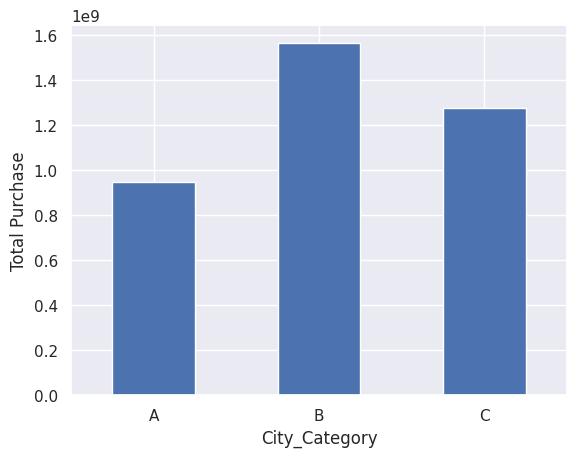

In [42]:
df.groupby("City_Category")['Purchase'].sum().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel("Total Purchase")

In [43]:
#Total purchase by male anf female

print(df.groupby("Marital_Status")['Purchase'].sum())

Marital_Status
Married      1538900975
Unmarried    2251380537
Name: Purchase, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '(Married, 0-17)'),
  Text(1, 0, '(Married, 18-25)'),
  Text(2, 0, '(Married, 26-35)'),
  Text(3, 0, '(Married, 36-45)'),
  Text(4, 0, '(Married, 46-50)'),
  Text(5, 0, '(Married, 51-55)'),
  Text(6, 0, '(Married, 55+)'),
  Text(7, 0, '(Unmarried, 0-17)'),
  Text(8, 0, '(Unmarried, 18-25)'),
  Text(9, 0, '(Unmarried, 26-35)'),
  Text(10, 0, '(Unmarried, 36-45)'),
  Text(11, 0, '(Unmarried, 46-50)'),
  Text(12, 0, '(Unmarried, 51-55)'),
  Text(13, 0, '(Unmarried, 55+)')])

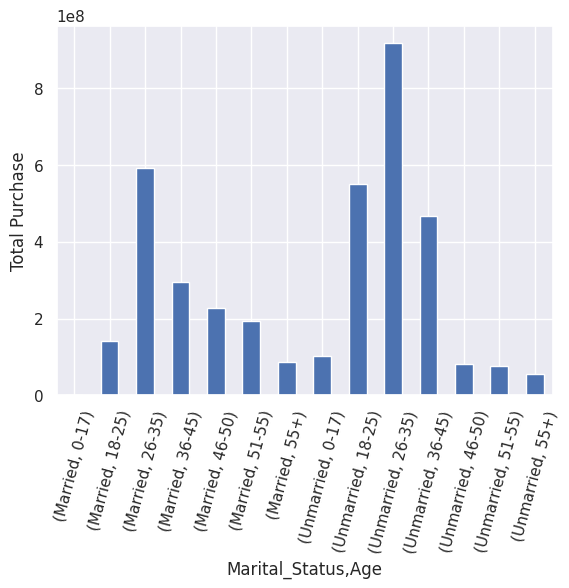

In [44]:
df.groupby(['Marital_Status','Age'])['Purchase'].sum().plot(kind = 'bar')
plt.ylabel('Total Purchase')
plt.xticks(rotation = 75)

Most purchase done is from the age group of 26-35 and unmarried , wherease least is done from unmarried with 55+ age

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '(0-17, A)'),
  Text(1, 0, '(0-17, B)'),
  Text(2, 0, '(0-17, C)'),
  Text(3, 0, '(18-25, A)'),
  Text(4, 0, '(18-25, B)'),
  Text(5, 0, '(18-25, C)'),
  Text(6, 0, '(26-35, A)'),
  Text(7, 0, '(26-35, B)'),
  Text(8, 0, '(26-35, C)'),
  Text(9, 0, '(36-45, A)'),
  Text(10, 0, '(36-45, B)'),
  Text(11, 0, '(36-45, C)'),
  Text(12, 0, '(46-50, A)'),
  Text(13, 0, '(46-50, B)'),
  Text(14, 0, '(46-50, C)'),
  Text(15, 0, '(51-55, A)'),
  Text(16, 0, '(51-55, B)'),
  Text(17, 0, '(51-55, C)'),
  Text(18, 0, '(55+, A)'),
  Text(19, 0, '(55+, B)'),
  Text(20, 0, '(55+, C)')])

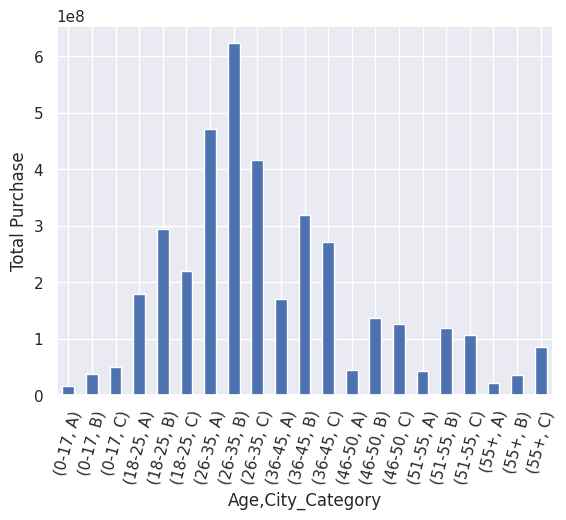

In [45]:
df.groupby(['Age', 'City_Category'])['Purchase'].sum().plot(kind = 'bar')
plt.ylabel('Total Purchase')
plt.xticks(rotation = 75)

Most purchase done is from the age group of 26-35 and City Category 'A' , wherease least purchase from the age group of 0-17 and 55+ from City Category 'A'